<a href="https://colab.research.google.com/github/CoreTech179/DataScienceProject/blob/main/ML_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify_top_songs_audio_features.csv to spotify_top_songs_audio_features (2).csv


#Preprocessing for ML

In [ ]:
#from mlxtend.feature_selection import SequentialFeatureSelector
ds=pd.read_csv("spotify_top_songs_audio_features.csv")
#ds.head(3)
ds.drop(columns=["id","track_name"],axis=1,inplace=True)
ds.head(3)

,artist_names,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,"ZAYN, PARTYNEXTDOOR",RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,Alessia Cara,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,The Killers,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123


In [ ]:
ds["key"].unique()

array(['G', 'C#/Db', 'A', 'F', 'G#/Ab', 'B', 'A#/Bb', 'E', 'C', 'D',
       'F#/Gb', 'D#/Eb'], dtype=object)

In [ ]:
ds["mode"].unique()

array(['Major', 'Minor'], dtype=object)

In [ ]:
ds["time_signature"].unique()

array(['4 beats', '5 beats', '3 beats', '1'], dtype=object)

In [ ]:
def binary_map(x):
    return x.map({'Major': 1, 'Minor': 0})

# Applying the function to the housing list
ds[['mode']] = ds[['mode']].apply(binary_map)

##Nominal/Label Encoding

In [ ]:
ds["artist_names"].unique()

array(['ZAYN, PARTYNEXTDOOR', 'Alessia Cara', 'The Killers', ...,
       'Young Thug, A$AP Rocky, Post Malone',
       'Eminem, Jack Harlow, Cordae', 'Kendrick Lamar, Tanna Leone'],
      dtype=object)

In [ ]:
ds["source"].unique()[:5]

array(['RCA Records Label', 'Def Jam Recordings', 'Island Records',
       'Atlantic/KSR', 'Republic Records'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['artist_names']=le.fit_transform(ds['artist_names'])
ds['source']=le.fit_transform(ds['source'])
ds['key']=le.fit_transform(ds['key'])
ds['time_signature']=le.fit_transform(ds['time_signature'])
ds.head(3)

,artist_names,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,2914,638,10,1,2,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,104,239,4,0,2,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,2667,389,4,1,2,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123


In [ ]:
ds.shape

(6513, 17)

#Splitting into training and testing

In [ ]:
input_data=ds.drop(columns=["streams"],axis=1)
target_data=ds["streams"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(input_data,target_data,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

((5210, 16), (1303, 16))

In [ ]:
y_test.shape,y_train.shape

((1303,), (5210,))

# Linear Regression Analysis

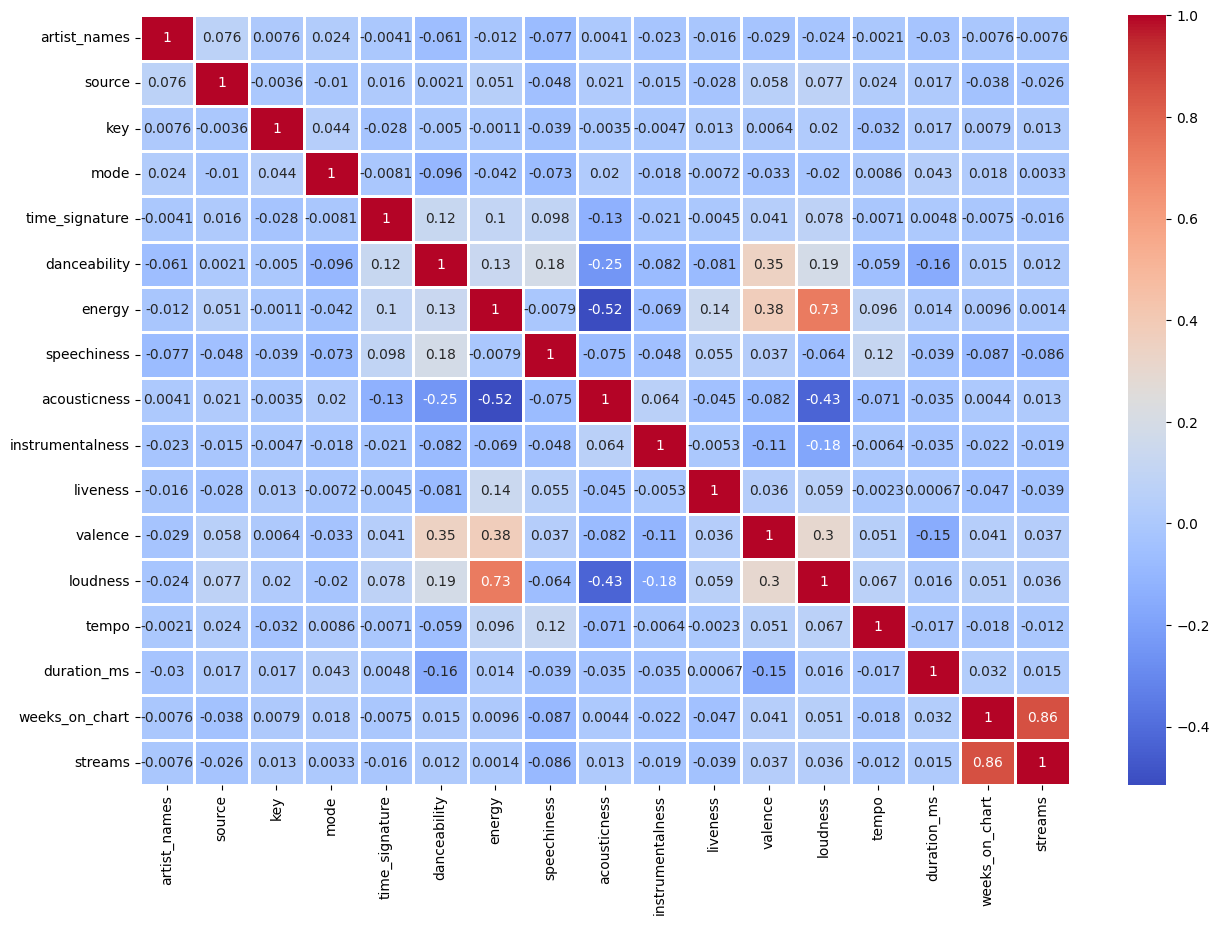

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(ds.corr(),annot=True,cmap="coolwarm",linewidths=1)
plt.show()

##Simple

In [ ]:
li_pd=pd.DataFrame({
    "weeks_on_chart": ds['weeks_on_chart'],
    "streams": ds['streams']
})
li_pd.head(3)

,weeks_on_chart,streams
0,17,107527761
1,2,9944865
2,125,512388123


In [ ]:
x=li_pd[["weeks_on_chart"]]
y=li_pd["streams"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

Model Creation

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([7790538.10555099])

In [ ]:
lr.intercept_

1264622.1006346196

y= 7790538.10555099*x + 1264622.1006346196

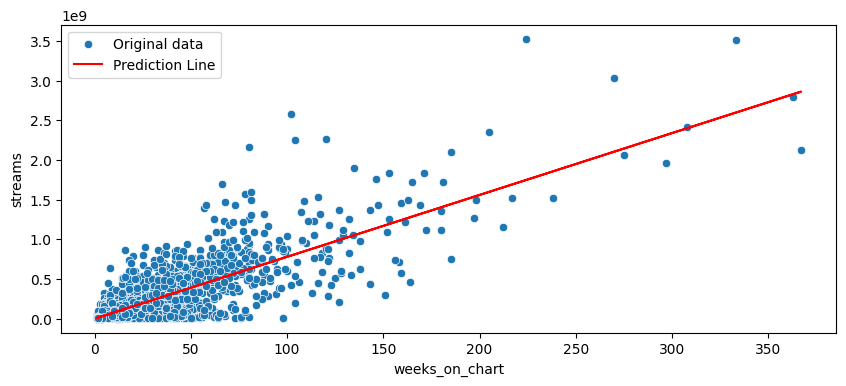

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x="weeks_on_chart",y="streams",data=li_pd)
plt.plot(li_pd["weeks_on_chart"],lr.predict(x),color="red")
plt.legend(["Original data","Prediction Line"])
plt.show()

Predict stream values as per your weeks_on_chart data

In [ ]:
lr.predict([[30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.34980765e+08])

In [ ]:
lr.score(x_test,y_test)*100

76.09903421105253

Model works with 76% efficiency

In [ ]:
ds.loc[(ds["weeks_on_chart"]==30),'streams']

4       301860377
105     287702449
346     441139199
464     126429391
488     258532843
504     125518222
719     394900744
776     373006602
1290     40515208
1353    160353560
1692    162838942
1846    160485880
1979    267165039
2058     82712724
2126    261777805
2331    177022418
2332    508438262
2338    138067700
2373    260466659
2597    142458409
2864    264095621
2959    327618324
3134    291103173
3256    186434261
3478    143340893
3693     65434663
4076    232932271
4185    114922075
4227    164762914
4243    213478112
4341    442696994
4509    262903680
4531    115835340
4584    473041960
4616    167765768
4682     98683838
4713    117108605
4802    282213371
5123    225389365
5236    197126834
5735    158864435
5931    497215439
6151      7465455
6164    166292891
6338    329306934
6431    303506679
Name: streams, dtype: int64

Out of this values many have came close to the model's predicted value 2.3e+08

##Multiple

In [ ]:
li_mpd=pd.DataFrame({
    "loudness": ds['loudness'],
    "valence": ds['valence'],
    "energy": ds['energy']
})
li_mpd.head(3)

,loudness,valence,energy
0,-6.029,0.524,0.627
1,-6.276,0.437,0.755
2,-5.230,0.236,0.911


In [ ]:
li_mpd.describe()

,loudness,valence,energy
count,6513.000000,6513.000000,6513.000000
mean,-6.350667,0.492412,0.636522
std,2.536114,0.227001,0.164813
min,-34.475000,0.032000,0.021800
25%,-7.564000,0.316000,0.534000
50%,-5.983000,0.489000,0.651000
75%,-4.673000,0.669000,0.759000
max,1.509000,0.982000,0.989000


In [ ]:
x=li_mpd.drop(columns=["energy"],axis=1)
y=li_mpd["energy"]

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1_train,y1_train)

LinearRegression()

In [ ]:
lr.coef_

array([0.04428532, 0.1210148 ])

In [ ]:
lr.intercept_

0.8573449564278953

Energy=m1x1+m2x2+c

In [ ]:
x.columns

Index(['loudness', 'valence'], dtype='object')

In [ ]:
y

0       0.627
1       0.755
2       0.911
3       0.625
4       0.781
        ...  
6508    0.779
6509    0.313
6510    0.730
6511    0.530
6512    0.715
Name: energy, Length: 6513, dtype: float64

In [ ]:
lr.predict(x)

array([0.65376054, 0.63229378, 0.65429225, ..., 0.68871795, 0.50700449,
       0.62821671])

In [ ]:
lr.score(x1_test,y1_test)*100

53.877955493886965

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y, lr.predict(x))
mse = mean_squared_error(y, lr.predict(x))
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.5562761991425139
Mean Squared Error: 0.01205109561206278


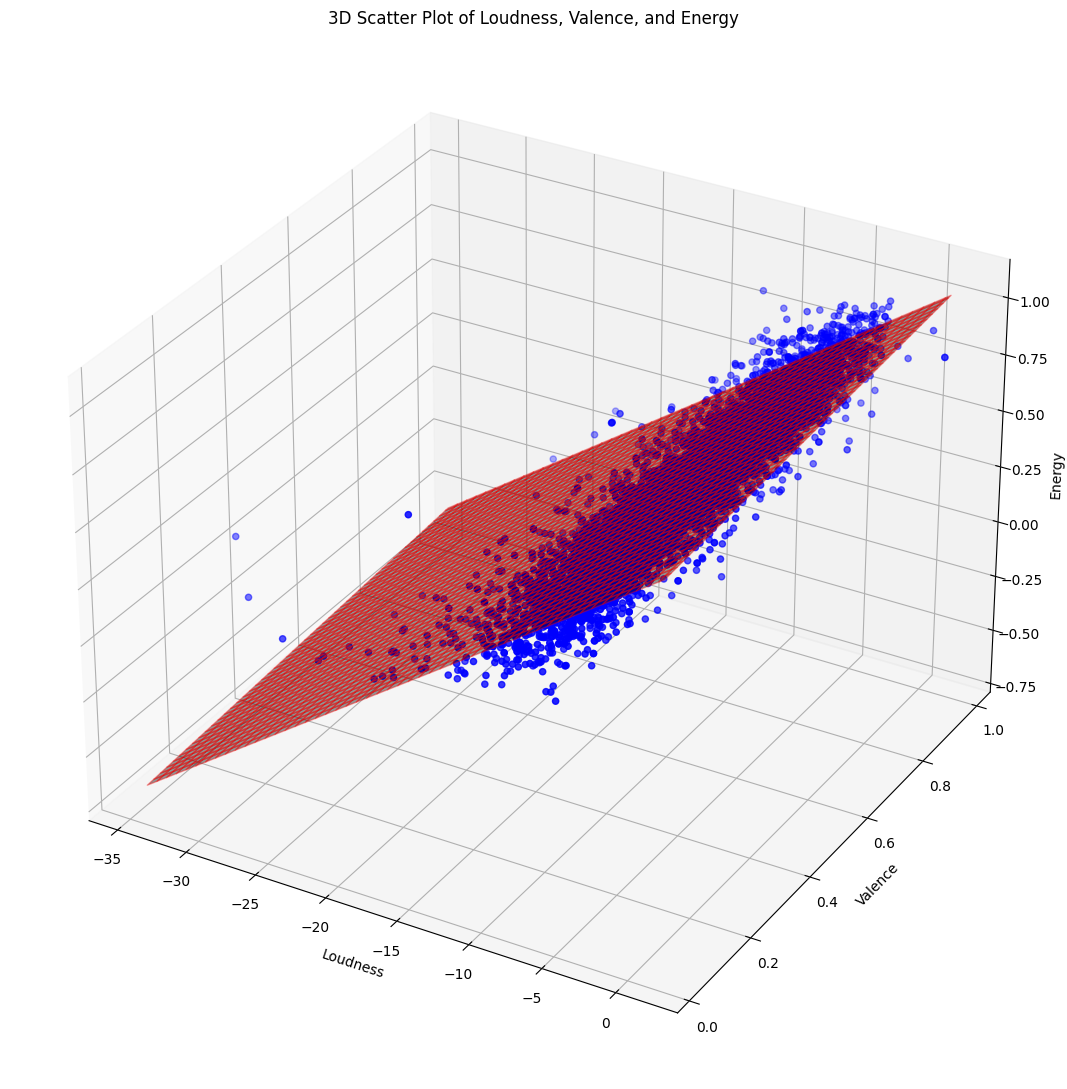

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(li_mpd['loudness'], li_mpd['valence'], y, color='blue')
ax.set_xlabel('Loudness',fontsize=10)
ax.set_ylabel('Valence',fontsize=10)
ax.set_zlabel('Energy',fontsize=10)
ax.set_title('3D Scatter Plot of Loudness, Valence, and Energy')

# Create a mesh grid for plotting the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(li_mpd['loudness'].min(), li_mpd['loudness'].max(), 100),
                             np.linspace(li_mpd['valence'].min(), li_mpd['valence'].max(), 100))
z_surf = lr.intercept_ + lr.coef_[0] * x_surf + lr.coef_[1] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.4, color='None', edgecolor='r')
plt.tight_layout()
plt.show()


#Polynomial Regression Analysis

In [ ]:
pyr=pd.DataFrame({
    "Trending(weeks)": ds['weeks_on_chart'],
    "Streams": ds['streams']
})

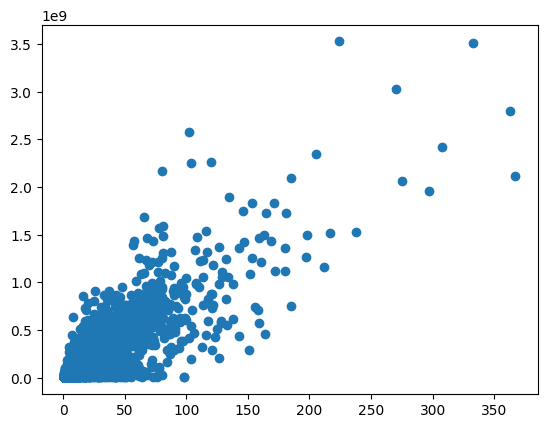

In [ ]:
plt.scatter(pyr["Trending(weeks)"],pyr["Streams"])
plt.show()

In [ ]:
x2=pyr[["Trending(weeks)"]]
y2=pyr["Streams"]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)
poly_reg.fit(x2)
x2=poly_reg.transform(x2)

y= mx1^5 + ax2^4 + bx3^3 + cx4^2 + dx5 + (ex6+c) where x6=1(x^0=1)

In [ ]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test= train_test_split(x2,y2,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x2_train,y2_train)

LinearRegression()

In [ ]:
lr.score(x2_test,y2_test)*100

76.21402383825038

In [ ]:
lr.coef_

array([ 0.00000000e+00,  6.51108591e+06,  6.94691721e+04, -8.91981277e+02,
        3.87593864e+00, -5.32471389e-03])

In [ ]:
lr.intercept_

2780312.674612224

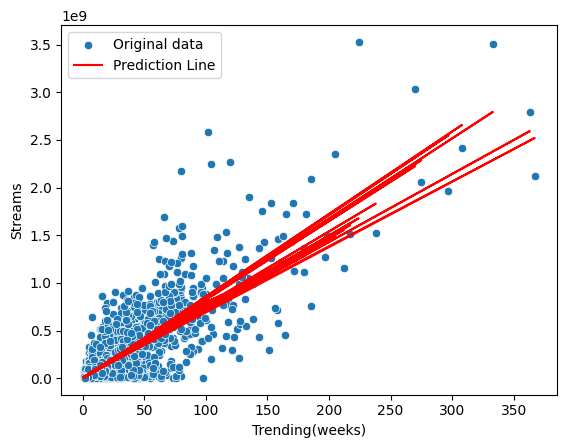

In [ ]:
sns.scatterplot(x="Trending(weeks)",y="Streams",data=pyr)
plt.plot(pyr["Trending(weeks)"],lr.predict(x2),color="red")
plt.legend(["Original data","Prediction Line"])
plt.show()

In [ ]:
test=poly_reg.transform([[40]])
test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000e+00, 4.000e+01, 1.600e+03, 6.400e+04, 2.560e+06, 1.024e+08]])

In [ ]:
lr.predict(test)

array([3.26664775e+08])

In [ ]:
ds.loc[(ds["weeks_on_chart"]==40),'streams']

205     119961848
1165    506544287
1417     68673423
1546      6127103
1658    461769872
2134    512900063
2275     36916755
3461    122373033
3468    321110284
3771    318997516
4063    535964658
4220    361967228
4417    109650167
4436     32317702
4815    316445866
5661     77373767
5716    497087870
5859    110912030
5936    378596557
6266    439792906
Name: streams, dtype: int64

Out of 20 different given values,our model is successfull to reach 5-6 values accurately and reached close to 7-8 values. (76.21% efficiency)